# Plotting in Paretobench
This notebook demonstrates the plotting features built into ParetoBench for use with the container objects.

In [1]:
import paretobench as pb
from paretobench.plotting import (
    plot_decision_var_pairs,
    plot_objectives,
    plot_objectives_history,
    plot_decision_var_pairs_history,
    PlotDecisionVarHistorySettings,
    PlotObjectivesHistorySettings,
    animate_decision_vars,
    animate_objectives,
    PlotObjectivesSettings,
    PlotDecisionVarPairsSettings,
)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load some data to plot
exp = pb.Experiment.load("data/for_plotting.h5")

## Plotting for the `Population` Objects
Functions in the library allow you to plot apprxomiate Pareto front as well as the decision variables. We demonstrate their use and and options here.

Text(0.5, 1.0, 'Specify Pareto Front Manually')

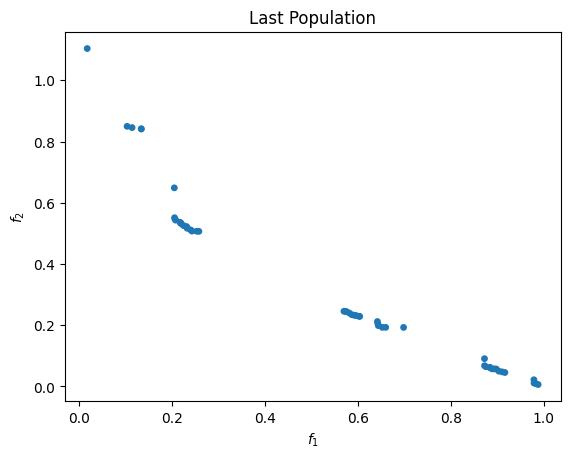

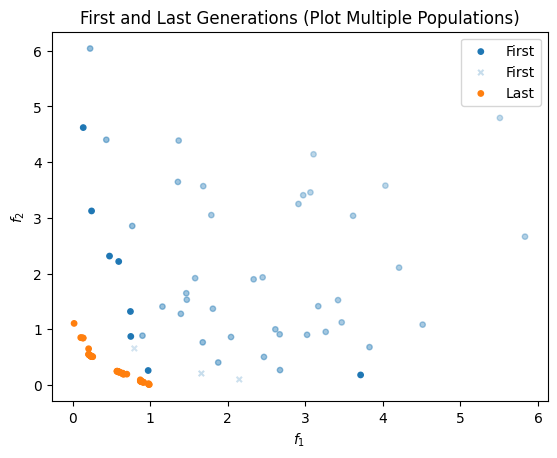

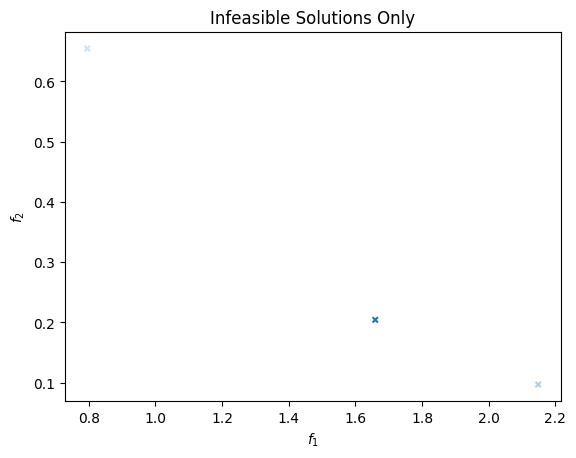

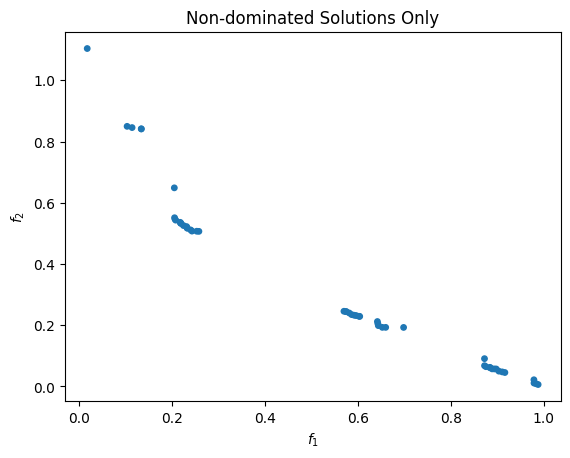

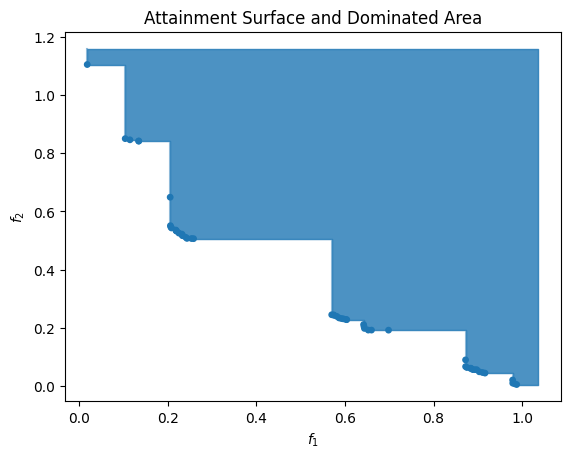

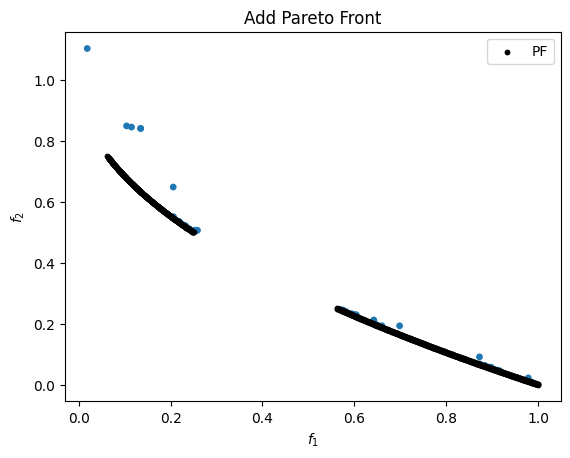

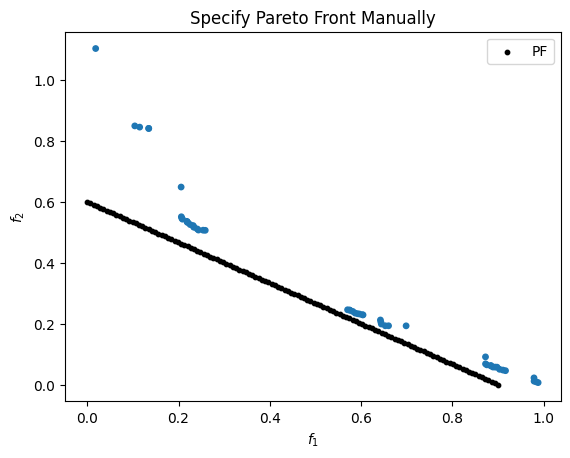

In [3]:
# Get the final generation from one of the runs
idx = 0
first_pop = exp.runs[idx].reports[0]
last_pop = exp.runs[idx].reports[-1]

# Plot the objectives with default parameters. The dominated solutions are
# shown with some transparency to distinguish them
plot_objectives(last_pop)
plt.title("Last Population")

# Plot the first generation to demonstrate what infeasible solutions look like and show multiple plotting
fig, ax = plot_objectives(first_pop, settings=PlotObjectivesSettings(label="First"))
plot_objectives(last_pop, fig, ax, settings=PlotObjectivesSettings(label="Last"))
plt.title("First and Last Generations (Plot Multiple Populations)")
plt.legend()

# Show off the infeasible solutions
plot_objectives(first_pop, settings=PlotObjectivesSettings(plot_feasible="infeasible"))
plt.title("Infeasible Solutions Only")

# Don't plot the dominated solutions
plot_objectives(last_pop, settings=PlotObjectivesSettings(plot_dominated="non-dominated"))
plt.title("Non-dominated Solutions Only")

# Add the attainment surface
plot_objectives(last_pop, settings=PlotObjectivesSettings(plot_attainment=True, plot_dominated_area=True))
plt.title("Attainment Surface and Dominated Area")

# Let's add the analytical Pareto front to it
plot_objectives(last_pop, settings=PlotObjectivesSettings(problem=exp.runs[idx].problem))
plt.title("Add Pareto Front")

# Can also manually specify the objecitves if not using a standard problem
pf = np.column_stack((np.linspace(0, 0.9, 128), np.linspace(0.6, 0, 128)))
plot_objectives(last_pop, settings=PlotObjectivesSettings(pf_objectives=pf))
plt.title("Specify Pareto Front Manually")

Text(0.5, 1.0, 'Show the dominated area (select first few generations)')

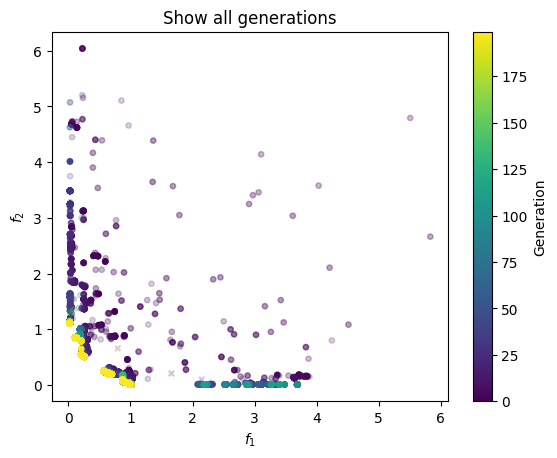

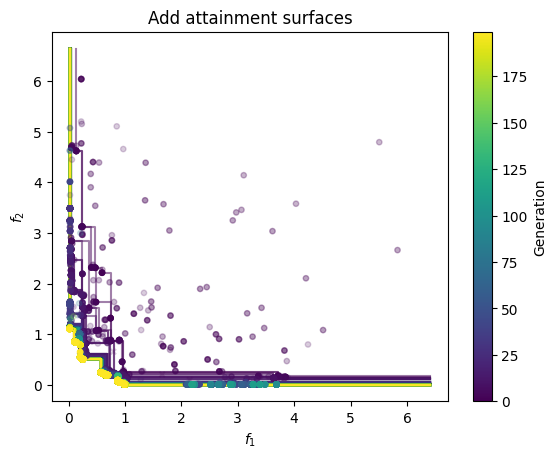

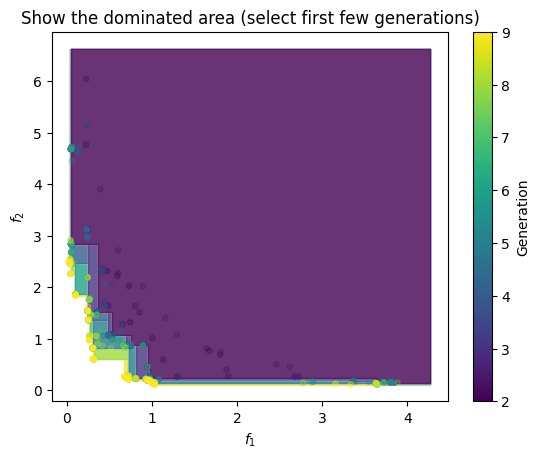

In [6]:
# We can also plot directly from the history objects which opens up new features
plot_objectives_history(
    exp.runs[0], settings=PlotObjectivesHistorySettings(plot_attainment=False, generation_mode="cmap")
)
plt.title("Show all generations")

plot_objectives_history(
    exp.runs[0], settings=PlotObjectivesHistorySettings(plot_attainment=True, generation_mode="cmap")
)
plt.title("Add attainment surfaces")

plot_objectives_history(exp.runs[0], select=(2, 10), settings=PlotObjectivesHistorySettings(plot_dominated_area=True))
plt.title("Show the dominated area (select first few generations)")

Text(0.5, 0.98, 'Remove Dominated Individuals')

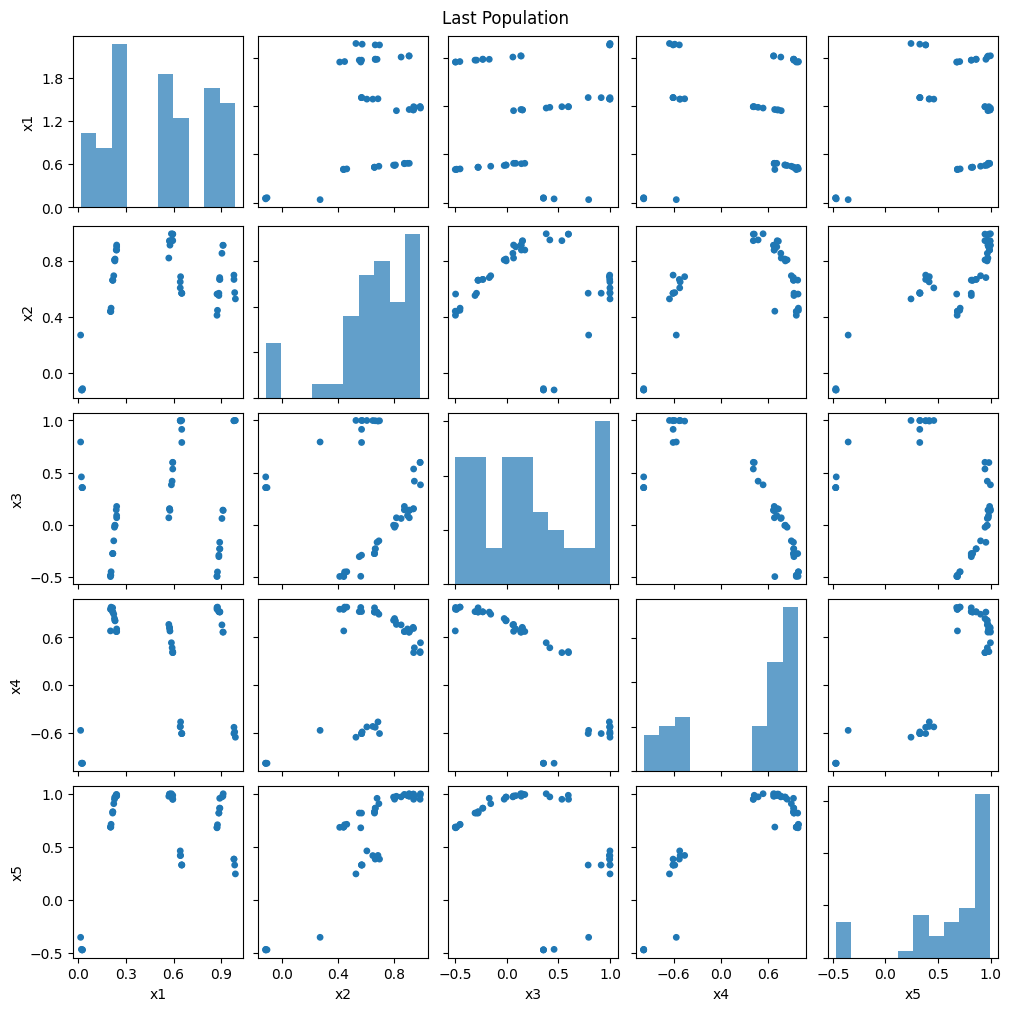

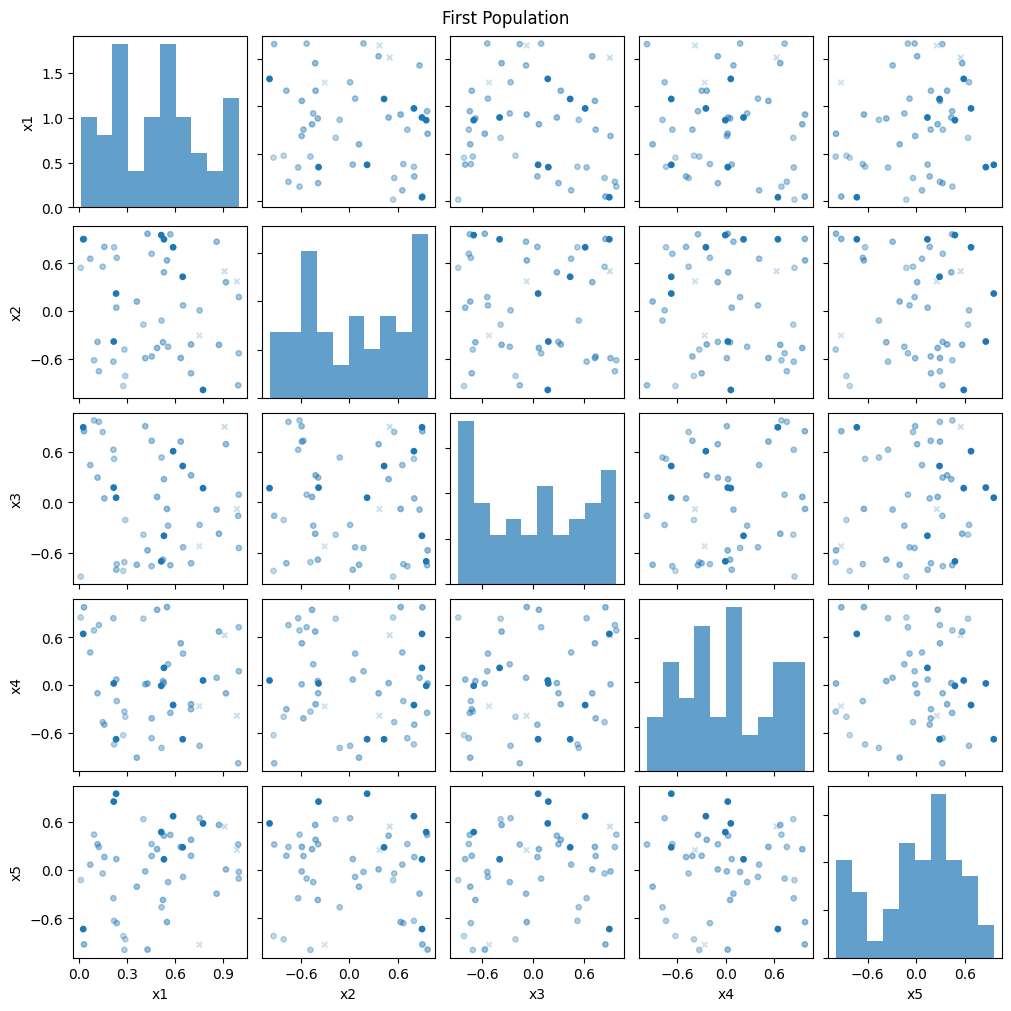

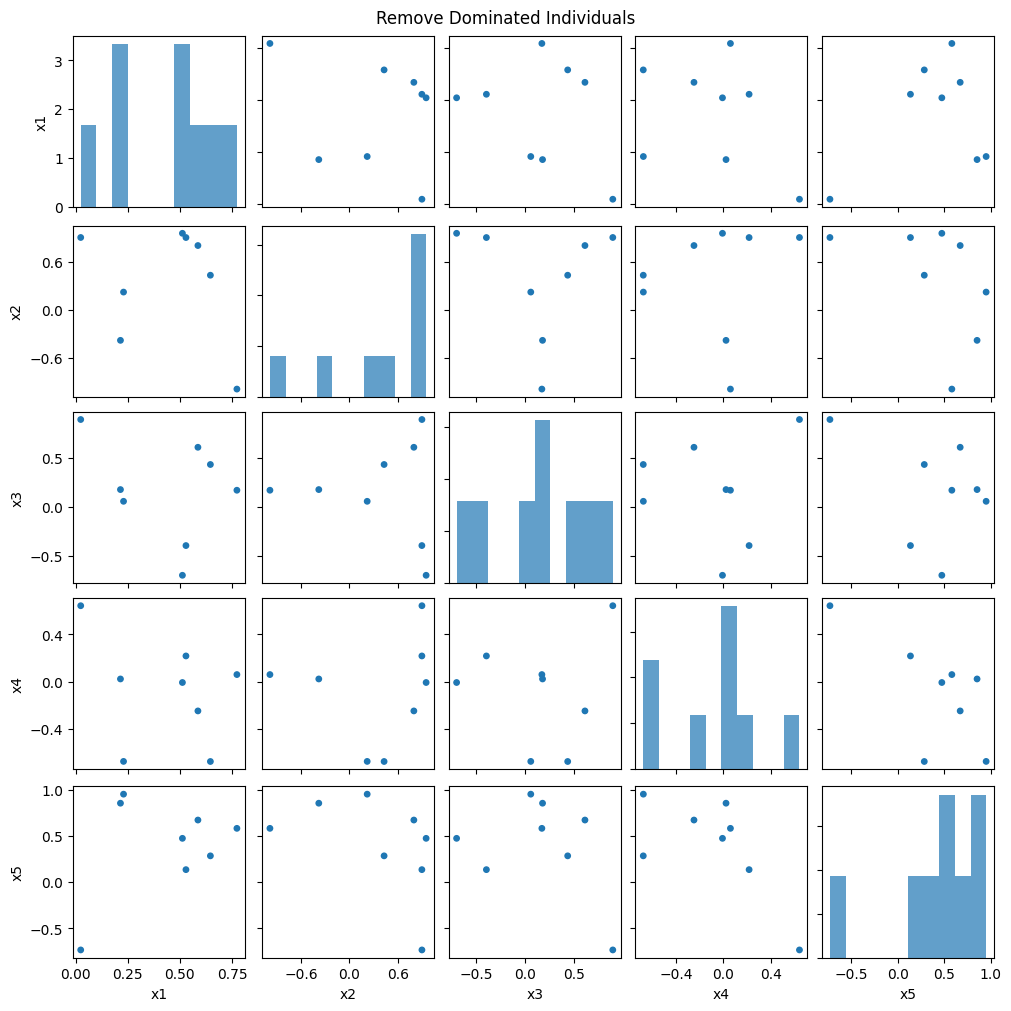

In [5]:
# Create a demo population and plot the decision variables
fig, axes = plot_decision_var_pairs(last_pop)
plt.suptitle("Last Population")

fig, axes = plot_decision_var_pairs(first_pop)
plt.suptitle("First Population")

fig, axes = plot_decision_var_pairs(first_pop, settings=PlotDecisionVarPairsSettings(plot_dominated="non-dominated"))
plt.suptitle("Remove Dominated Individuals")

(<Figure size 1000x1000 with 26 Axes>,
 array([[<Axes: ylabel='x1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='x2'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='x3'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='x4'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: xlabel='x1', ylabel='x5'>, <Axes: xlabel='x2'>,
         <Axes: xlabel='x3'>, <Axes: xlabel='x4'>, <Axes: xlabel='x5'>]],
       dtype=object))

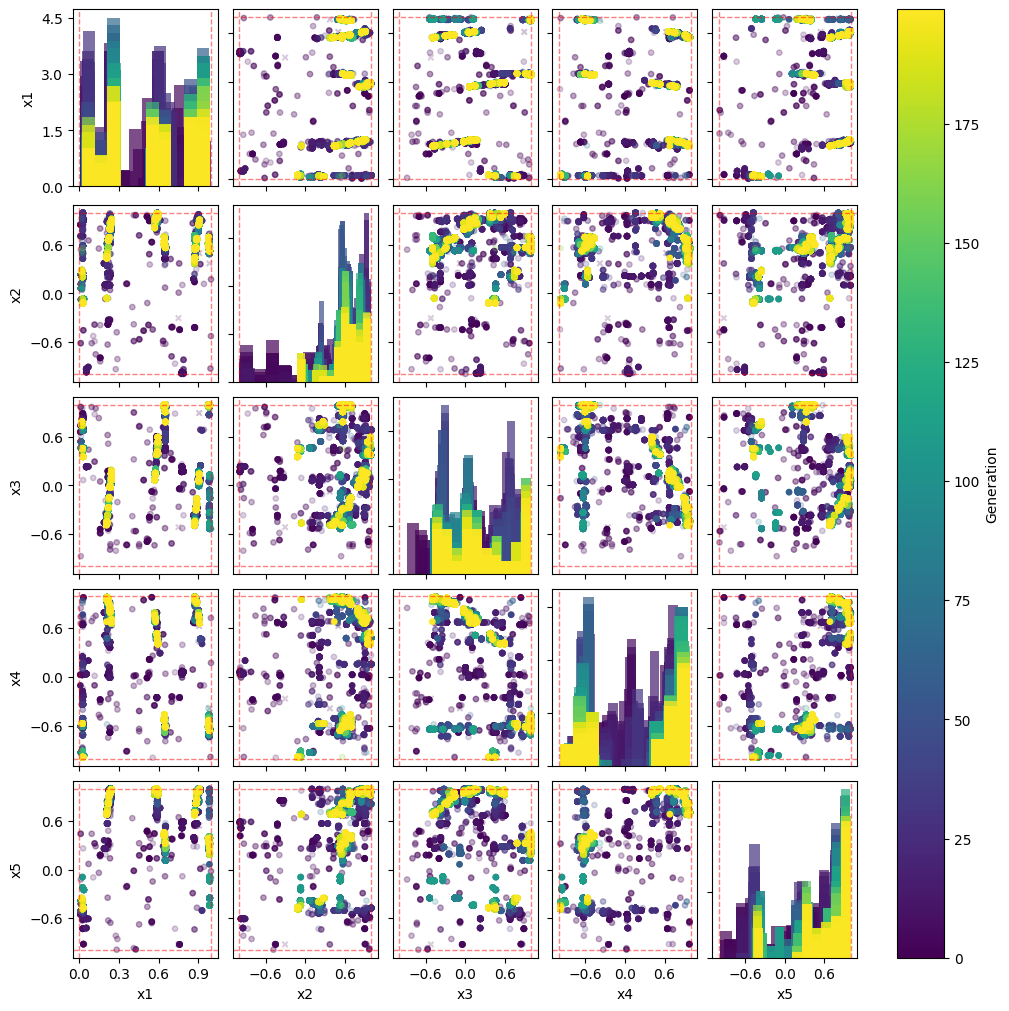

In [4]:
plot_decision_var_pairs_history(exp.runs[0], settings=PlotDecisionVarHistorySettings(plot_bounds=True))

## Creating Animations from `History` Objects
The history objects the internal state of an optimizer in the course of solving a problem. Several functions are included in ParetoBench which enable the creation of animations of the objective function values and the decision variables.

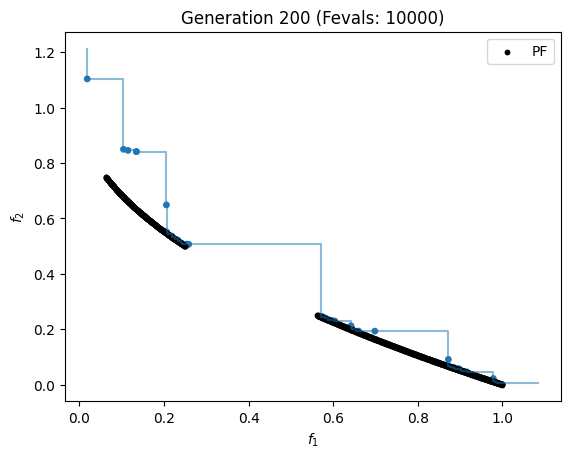

In [7]:
# Create an animation of the objective functions as the optimization progresses
animate_objectives(
    exp.runs[0],
    objectives_plot_settings=PlotObjectivesHistorySettings(plot_attainment=True, plot_pf=True),
    dynamic_scaling=True,
).save("objectives.mp4")

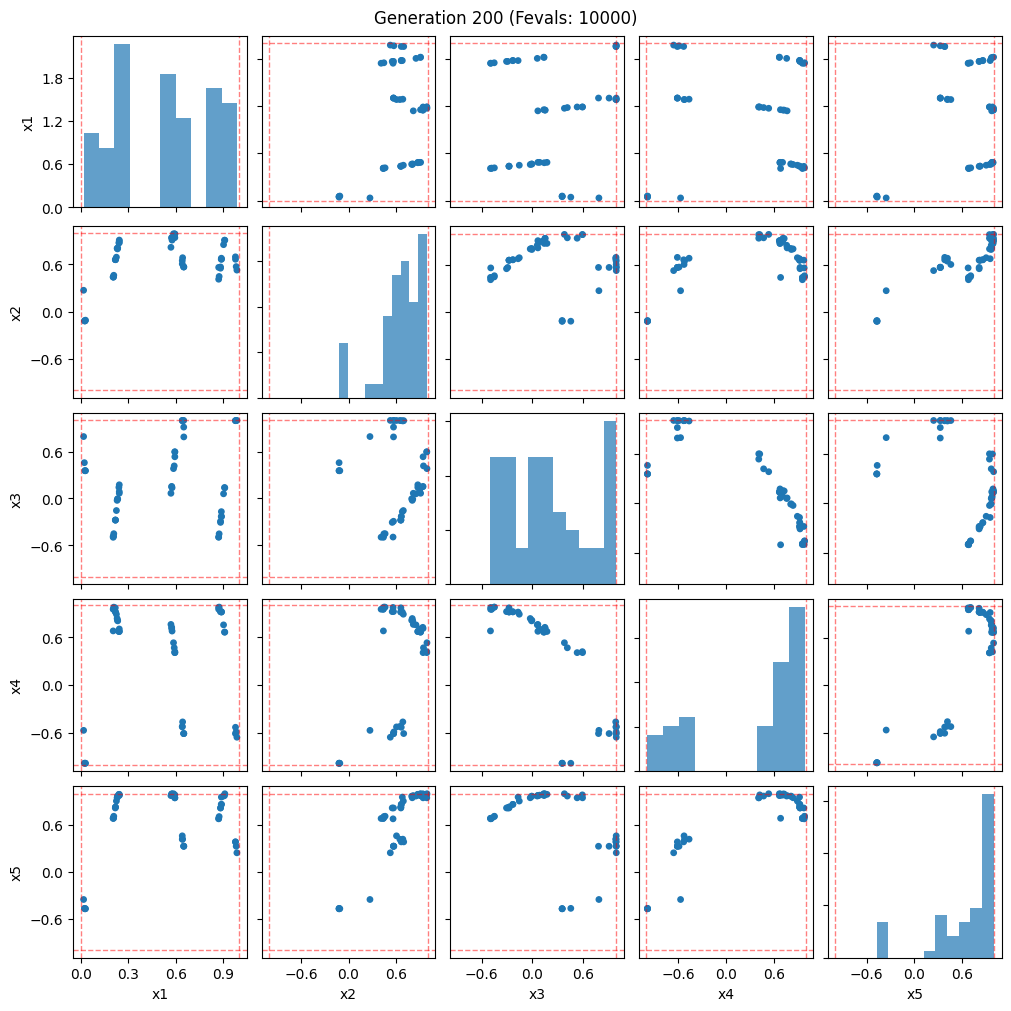

In [3]:
# Make pair plots of the decision variables as the optimization algorithm proceeds
animate_decision_vars(exp.runs[0]).save("decision_vars.mp4")

## Plotting 3D Data

Text(0.5, 0.92, 'Last Population')

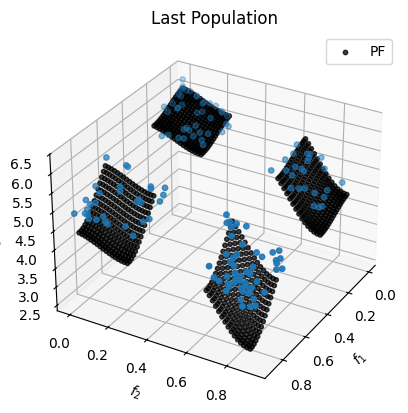

In [6]:
# Get the final generation from one of the runs
last_pop = exp.runs[1].reports[-1]

# Plot the objectives with default parameters. The dominated solutions are
# shown with some transparency to distinguish them
fig, ax = plot_objectives(last_pop, settings=PlotObjectivesSettings(problem=exp.runs[1].problem))
ax.view_init(30, 30)
plt.title("Last Population")

CPU times: user 698 ms, sys: 4.06 ms, total: 702 ms
Wall time: 701 ms


Text(0.5, 0.92, 'Attainment Surface')

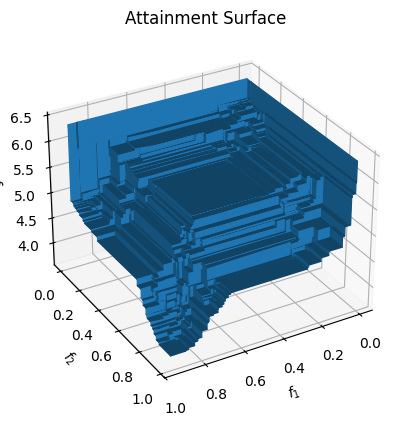

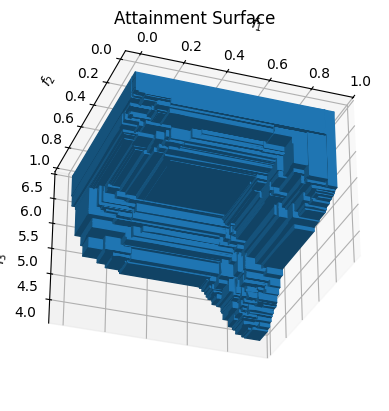

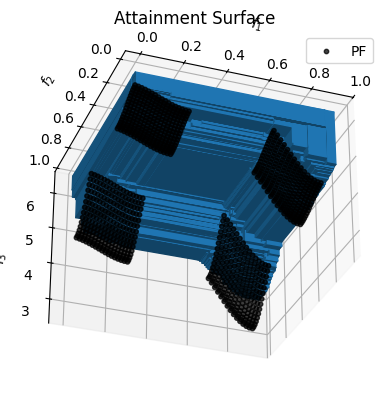

In [7]:
%%time
# Get the final generation from one of the runs
last_pop = exp.runs[1].reports[-1]

# Plot the attainment surface
fig, ax = plot_objectives(last_pop, settings=PlotObjectivesSettings(plot_attainment=True))
ax.view_init(30, 60)
plt.title("Attainment Surface")

# Another angle
fig, ax = plot_objectives(last_pop, settings=PlotObjectivesSettings(plot_attainment=True))
ax.view_init(-30, 250)
plt.title("Attainment Surface")

# Show in reference to the PF
fig, ax = plot_objectives(last_pop, settings=PlotObjectivesSettings(problem=exp.runs[1].problem, plot_attainment=True))
ax.view_init(-30, 250)
plt.title("Attainment Surface")